In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [76]:
dframe=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Sentiment Analysis/datasets_3384_5666_Shinzo Abe Tweet 20171024 - Tweet.csv')

In [77]:
dframe.tail(50)

,url,Full Name Show,Username Dir,Tweet Nav,Tweet Nav_link,Tweet Text Size Block,English Translation,Tweet Text Size Link,Tweet Text Size Link_link,Profile Tweet 1,Profile Tweet 2,Profile Tweet 3,Reply,Re Tweet,Like
29,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Sep 30,https://twitter.com/AbeShinzo/status/914110075...,北朝鮮の脅威から国民の命と平和な暮らしを守り抜く。ただひたすら国民のため、厳しい勤務環境の下...,Defend the people's life and peaceful living f...,NaN,NaN,599 replies,"12,140 retweets","26,772 likes",599,12K,27K
30,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Sep 30,https://twitter.com/AbeShinzo/status/914109941...,日本海で北朝鮮の弾道ミサイル警戒に当たり、今日、母港の舞鶴に戻ったばかりのイージス艦「みょう...,Hit North Korea's ballistic missile warning in...,pic.twitter.com/NctWbpP8Ip,https://t.co/NctWbpP8Ip,534 replies,"15,865 retweets","31,169 likes",534,16K,31K
31,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Sep 30,https://twitter.com/AbeShinzo/status/914104224...,いよいよ選挙戦が始まります。 「この国を、守り抜く。」 私たちは正々堂々、具体的な政策を全国...,"Finally election campaign begins. ""This countr...",pic.twitter.com/XxjMAEJN16,https://t.co/XxjMAEJN16,"2,169 replies","18,364 retweets","36,092 likes",2.2K,18K,36K
32,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Sep 13,https://twitter.com/AbeShinzo/status/907919416...,インドに到着しました。モディ首相には空港でお出迎え頂きました。pic.twitter.com...,I arrived in India. Modi is the Prime Minister...,pic.twitter.com/eokEYb9IoT,https://t.co/eokEYb9IoT,"2,108 replies","6,646 retweets","21,419 likes",2.1K,6.6K,21K
33,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Feb 24,https://twitter.com/AbeShinzo/status/835037199...,心を無にする。 プレミアムフライデーに、座禅を組みました。 慌ただしい毎日ですが、久しぶりに...,"The mind to free. Premium Friday, was set to Z...",pic.twitter.com/kWB5vHluSF,https://t.co/kWB5vHluSF,"9,346 replies","19,085 retweets","36,726 likes",9.3K,19K,37K
34,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Feb 22,https://twitter.com/AbeShinzo/status/834338479...,菅元総理は前々回の参院選挙の直前に突然、私を告訴しました。私を貶めることを目的とした売名行為...,KanHajime Prime Minister suddenly just before ...,NaN,NaN,"1,599 replies","6,716 retweets","10,513 likes",1.6K,6.7K,11K
35,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Feb 22,https://twitter.com/AbeShinzo/status/834338339...,元総理が現職の総理を告訴し、裁判で争うことになったことは残念でなりません。私は総理としての時...,Former Prime Minister accused the Prime Minist...,NaN,NaN,293 replies,"4,918 retweets","7,412 likes",293,4.9K,7.4K
36,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Feb 22,https://twitter.com/AbeShinzo/status/834338196...,最高裁の上告棄却により、まさに「真実の勝利」に最終判断が下りました。,"The appeal dismissal of the Supreme Court, the...",NaN,NaN,244 replies,"3,375 retweets","6,092 likes",244,3.4K,6.1K
37,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Feb 22,https://twitter.com/AbeShinzo/status/834338039...,この決定により当方の勝訴が確定しました。 昨年９月の高裁判決は菅総理の福島原発の海水注入に関...,Our favor have been finalized by this decision...,NaN,NaN,168 replies,"4,005 retweets","5,772 likes",168,4.0K,5.8K
38,https://twitter.com/AbeShinzo,安倍晋三,AbeShinzo,Feb 22,https://twitter.com/AbeShinzo/status/834337698...,菅直人元総理から提訴された「菅総理の海水注入はでっち上げ」と題する私のメールマガジン記事に対...,For defamation lawsuit against my mail magazin...,pic.twitter.com/mRuW3CrgbH,https://t.co/mRuW3CrgbH,327 replies,"7,513 retweets","8,730 likes",327,7.5K,8.7K


In [78]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
url                          79 non-null object
Full Name Show               79 non-null object
Username Dir                 79 non-null object
Tweet Nav                    79 non-null object
Tweet Nav_link               79 non-null object
Tweet Text Size Block        79 non-null object
English Translation          79 non-null object
Tweet Text Size Link         56 non-null object
Tweet Text Size Link_link    56 non-null object
Profile Tweet 1              79 non-null object
Profile Tweet 2              79 non-null object
Profile Tweet 3              79 non-null object
Reply                        79 non-null object
Re Tweet                     79 non-null object
Like                         79 non-null object
dtypes: object(15)
memory usage: 9.4+ KB


In [80]:
delete=['url','Username Dir','Tweet Nav','Tweet Nav_link','Tweet Text Size Block','Tweet Text Size Link','Tweet Text Size Link_link',
        'Profile Tweet 1','Profile Tweet 2','Profile Tweet 3']

delete1=['Full Name Show']

dframe=dframe.drop(labels=delete1, axis=1)

In [81]:
(dframe.isna().sum()/dframe.shape[0])*100

English Translation    0.0
Reply                  0.0
Re Tweet               0.0
Like                   0.0
dtype: float64

In [82]:
def English(Inpdata):
    cleanedArticle1=re.sub(r'[?|$|(),"".@#=><|!]Â&*/',r' ',Inpdata)
    cleanedArticle2=re.sub(r'[^a-z A-Z 0-9]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +', ' ',cleanedArticle5)
    return(cleanedArticle6)

In [83]:
dframe['Text']=dframe['English Translation'].apply(English)

In [84]:
def Reply_All(Inpdata):
    cleanedArticle1=re.sub(r'[?|$|(),""@#=><|!]Â&*/',r' ',Inpdata)
    cleanedArticle2=re.sub(r'[^0-9]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    return(cleanedArticle3)

In [85]:
dframe['Reply_New']=dframe['Reply'].apply(Reply_All)

In [93]:
dframe=dframe.drop(labels='Reply_New', axis=1)
dframe=dframe.drop(labels='Reply', axis=1)
dframe=dframe.drop(labels='Re Tweet', axis=1)
dframe=dframe.drop(labels='Like', axis=1)
dframe=dframe.drop(labels='English Translation', axis=1)

In [86]:
def Reply_new(inpdata):
    return(inpdata.strip('K'))

In [87]:
dframe['ReplyNew']=dframe['Reply'].apply(Reply_new)

In [88]:
def Re_Tweet_new(inpdata):
    return(inpdata.strip('K'))

In [89]:
dframe['ReTweetNew']=dframe['Re Tweet'].apply(Re_Tweet_new)

In [90]:
def Like_new(inpdata):
    return(inpdata.strip('K'))

In [91]:
dframe['LikeNew']=dframe['Like'].apply(Like_new)

In [174]:
dframe.head()

,ReplyNew,ReTweetNew,LikeNew,Tweetstem
0,1.1,5.8,15.0,"[[elect, period, candid, liber, democrat, part..."
1,606.0,3.7,8.9,"[[foreign, visitor, number, tripl, past, five,..."
2,358.0,2.2,4.9,"[[tomorrow, octob, saturday, susumusan, abe, p..."
3,456.0,3.1,6.6,"[[expand, system, necessari, return, start, be..."
4,271.0,2.3,5.6,"[[tomorrow, octob, friday, susumusan, abe, pre..."


In [178]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
ReplyNew      79 non-null float64
ReTweetNew    79 non-null float64
LikeNew       79 non-null float64
Tweetstem     79 non-null object
dtypes: float64(3), object(1)
memory usage: 2.6+ KB


In [96]:
dframe['ReplyNew']=dframe['ReplyNew'].astype(float)

In [97]:
dframe['LikeNew']=dframe['LikeNew'].astype(float)
dframe['ReTweetNew']=dframe['ReTweetNew'].astype(float)

In [98]:
def Token_new(inpdata):
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(inpdata)
    return(tokens)

In [99]:
dframe['TweetNew']=dframe['Text'].apply(Token_new)

In [100]:
dframe=dframe.drop(labels='Text', axis=1)

In [44]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

In [102]:
def Stem_Stop(Inpdata):
    texts=[]
    en_stop = get_stop_words('en')
    ps=PorterStemmer()
    stopped_tokens = [i for i in Inpdata if not i in en_stop]
    porter_stem=[ps.stem(word) for word in stopped_tokens ]
    texts.append(porter_stem)
    return(texts)

In [103]:
dframe['Tweetstem']=dframe['TweetNew'].apply(Stem_Stop)

In [105]:
dframe=dframe.drop(labels='TweetNew', axis=1)

In [146]:
dframe=dframe.drop(labels='corpustext', axis=1)

In [195]:
corp=dframe.Tweetstem
document=[''.join(str(text))for text in corp]

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [197]:
tfid=TfidfVectorizer()
X=tfid.fit_transform(document)
Frame2=pd.DataFrame(X.toarray(),columns=tfid.get_feature_names())

In [199]:
Frame2.head()

,000,150,191,1950,1968,2011,2012,2fn8yz2,365,40,4fohcivnmc,4nnvhk,4ohfxdhumo,4sewor7exh,62fsrdvkoe,6qtdsiex1a,921744056987693057,abduct,abducte,abe,abematv,abenom,abeshinzo,abil,abl,absolut,academi,accomplish,accus,acknowledg,activ,administr,admir,advantag,aegi,aer,affect,afternoon,ago,agricultur,aichi,airport,aliv,alli,allow,along,alreadi,also,alway,ambassador,announc,anyon,aoyama,appeal,appear,area,around,arriv,arrow,articl,ask,asset,astronaut,athlet,attack,attempt,attend,avail,awar,azldsio8gxi,back,ballist,bank,bankruptci,barn,basi,battl,becam,becom,began,begin,begovp,behav,behavior,belov,benefit,best,big,birth,bless,bloom,board,boldli,brake,breach,break,bright,bring,broadcast,built,burn,busi,call,calm,came,camera,campaign,candid,carbon,case,cast,catch,celebr,center,ceremoni,chairman,challeng,championship,chanc,charm,check,cheer,cherish,cherri,chief,children,citi,citizen,clean,clear,click,climb,close,cloth,coach,com,come,command,comment,commit,commun,compani,complaint,complet,compos,concret,condemn,condol,confid,confirm,confront,connect,consecut,constant,construct,contamin,contend,contest,continu,conven,convers,cooper,corner,correctli,correspond,council,counter,counti,countri,court,courtesi,creat,creation,crippl,crisi,cultur,cyber,daiichi,dairi,danc,daphn,date,day,deal,debat,decid,decis,declin,decommiss,decor,dedic,deep,deepli,defam,defend,defens,delay,delici,deliv,democrat,departur,detail,determin,develop,devot,difficult,diplomat,disast,discuss,dismiss,disparag,dog,domest,doubl,dream,dt1kerflb,earli,earn,earnestli,earthquak,east,ebdcykt6om,econom,economi,educ,effect,effort,eight,ej5lr4s3r8,elect,electr,embrac,emndcadryb,encount,encourag,end,enhanc,ensur,entitl,environ,eokeyb9iot,equinox,era,essenti,estat,even,everi,everybodi,everyon,everyth,exchang,excit,exempt,exhibit,exit,expand,expect,expert,expo,express,face,fact,fair,famili,farmer,father,favor,fee,feel,felt,festiv,fifth,fight,file,final,firm,firmli,first,fisheri,fit,five,fli,flower,focus,fold,follow,food,forc,forefront,foreign,forestri,forev,former,forward,fp0iqnytsk,frb,free,freedom,friday,friend,friendli,front,fuji,fukushima,fulfil,full,futaba,futur,fxs7gztg20,g6ipvduwqf,gakkwxc2u4,gakuin,garden,gather,gave,gdp,gener,get,gift,gifu,give,gjxi1sknek,go,gon,gonta,good,goodwil,govern,grade,graduat,grandfath,gratitud,grave,great,greet,group,growth,guest,half,hall,hamadori,happi,hard,harsh,harvard,harvest,healthi,heard,heartfelt,heavi,height,held,help,high,higher,highli,highway,histor,hit,hoax,hokkaido,home,hometown,hope,hous,hscezwlqwl,http,hyogo,hzk3ds9rin,ichinoseki,ikeru,immedi,immigr,imperi,implement,import,inaugur,incid,includ,increas,incumb,inde,india,indiscrimin,individu,industri,inform,inher,inject,injur,innermost,innoc,int,intern,invit,ise,isfwmid5yl,issu,iwaki,iwat,jakarta,japan,japanes,jimin,jjrynlvxfl,job,join,judgment,just,kagawa,kagoshima,kai,kan,kanagawa,kanhajim,kanojora,keenli,kennedi,kept,kill,kilomet,kishi,koho,korea,korean,kumamoto,kune,kwb5vhlusf,kyoto,la,land,landladi,larg,last,later,launch,lawsuit,ldp,lead,leader,learn,let,level,liber,lie,life,lifesav,like,littl,liubup6ip,live,live2,local,long,look,lost,lot,luck,lv307275744,lwjdvsigwp,made,magazin,mail,maizuru,major,manag,mani,matter,maxim,maximum,mean,measur,medit,medium,meet,megumi,met,middl,milk,million,mind,minist,minut,miss,missil,mission,miyagi,modi,moment,monday,month,morn,mosei,motiv,mount,movement,mp,mruw3crgbh,much,multipli,museum,must,myoko,n2npfr7e16,n9ob57kaci,nagasaki,nagato,naoto,nara,nation,natur,nctwbpp8ip,necessari,need,net,never,new,next,nico,nicovideo,niigata,nine,nitorimashit,north,noth,now,nsc,nuclear,nuclearsecur,nuclearsummitp,nucleu,number,obama,obscur,ocb08b1mtz,occur,octob,odyqgyb0va,offer,offic,offici,oil,okinuk,one,open,order,origin,osaka,outgo,outrag,oval,overcom,palac,park,part,parti,pass,past,peac,peer,peopl,per,period,personnel,phhw29bvwi,photo,pic,pick,plant,play,player,pleas,point,polici,polit,port,possibl,postur,power,pray,prayer,prefectur,premium,presid,press,pre

In [201]:
Frame2.shape

(79, 911)

In [202]:
from gensim import matutils, models
import scipy.sparse

In [203]:
corpusn=matutils.Sparse2Corpus(scipy.sparse.csr_matrix(Frame2))
id2wordn = dict((v, k) for k, v in tfid.vocabulary_.items())

In [215]:
ldn = models.LdaModel(corpus=corpusn, num_topics=10, id2word=id2wordn, passes=60)
ldn.print_topics()

[(0,
  '0.049*"becam" + 0.029*"back" + 0.025*"aegi" + 0.001*"administr" + 0.001*"ago" + 0.001*"area" + 0.001*"abenom" + 0.001*"attack" + 0.001*"bank" + 0.001*"4sewor7exh"'),
 (1,
  '0.041*"ballist" + 0.041*"becom" + 0.041*"1950" + 0.035*"abil" + 0.029*"aichi" + 0.028*"aoyama" + 0.026*"appeal" + 0.022*"4sewor7exh" + 0.006*"acknowledg" + 0.001*"abl"'),
 (2,
  '0.043*"abl" + 0.041*"6qtdsiex1a" + 0.039*"ambassador" + 0.030*"along" + 0.030*"attack" + 0.006*"astronaut" + 0.001*"airport" + 0.001*"2fn8yz2" + 0.001*"abil" + 0.001*"abenom"'),
 (3,
  '0.040*"bank" + 0.038*"attempt" + 0.038*"battl" + 0.032*"academi" + 0.027*"basi" + 0.026*"awar" + 0.026*"astronaut" + 0.023*"ask" + 0.021*"alway" + 0.015*"40"'),
 (4,
  '0.042*"avail" + 0.037*"advantag" + 0.036*"announc" + 0.029*"attend" + 0.029*"2fn8yz2" + 0.028*"aer" + 0.025*"anyon" + 0.023*"affect" + 0.016*"000" + 0.013*"ago"'),
 (5,
  '0.030*"4nnvhk" + 0.028*"accomplish" + 0.027*"abematv" + 0.027*"921744056987693057" + 0.027*"62fsrdvkoe" + 0.027*

In [ ]:
dframe=dframe.drop(labels='Tweetstem', axis=1)

In [221]:
dframe.head()

,ReplyNew,ReTweetNew,LikeNew
0,1.1,5.8,15.0
1,606.0,3.7,8.9
2,358.0,2.2,4.9
3,456.0,3.1,6.6
4,271.0,2.3,5.6


In [226]:
Frame2['Reply']=dframe['ReplyNew']
Frame2['ReTweet']=dframe['ReTweetNew']
Frame2['Like']=dframe['LikeNew']

In [228]:
Frame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Columns: 914 entries, 000 to Like
dtypes: float64(914)
memory usage: 564.2 KB


In [229]:
Frame2.isnull().sum()

000                   0
150                   0
191                   0
1950                  0
1968                  0
2011                  0
2012                  0
2fn8yz2               0
365                   0
40                    0
4fohcivnmc            0
4nnvhk                0
4ohfxdhumo            0
4sewor7exh            0
62fsrdvkoe            0
6qtdsiex1a            0
921744056987693057    0
abduct                0
abducte               0
abe                   0
abematv               0
abenom                0
abeshinzo             0
abil                  0
abl                   0
absolut               0
academi               0
accomplish            0
accus                 0
acknowledg            0
activ                 0
administr             0
admir                 0
advantag              0
aegi                  0
aer                   0
affect                0
afternoon             0
ago                   0
agricultur            0
aichi                 0
airport         

In [231]:
frame2_pkl=pd.to_pickle(Frame2,'C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/frame2_pkl.pkl')

In [3]:
frame2_pkl=pd.read_pickle('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/frame2_pkl.pkl')

In [4]:
Target=['Like']
y=frame2_pkl[Target].values

In [5]:
frame2_pkl=frame2_pkl.drop(labels='Like',axis=1)
predictors=frame2_pkl.columns
X=frame2_pkl[predictors].values

In [6]:
from sklearn.preprocessing import StandardScaler

predictor_scaler=StandardScaler()
Target_scaler=StandardScaler()

X=predictor_scaler.fit_transform(X)
y=Target_scaler.fit_transform(y)

In [7]:
print(X.shape)
print(y.shape)

(79, 913)
(79, 1)


In [71]:
##PCA
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=70,n_iter=5, random_state=4500)
reduced_X = svd.fit_transform(X)
print(np.round(reduced_X[0:4],2))

[[ -1.4   -1.03  -0.31  -1.73  -1.37  -1.17  -3.35  -1.75   2.48   1.85
   -3.51   7.8   -1.36  -3.97   1.55  -0.62  -2.23   1.15   0.78   0.32
   -5.77  -2.49   4.28  -3.49  -1.98   0.17   5.95   0.67  -2.68  -9.51
   -3.85   1.12 -11.14 -13.44   9.13   2.48   0.77  -4.72   0.03 -11.79
   -1.51   3.47  -0.45   1.88  -2.28  -0.16  -3.75  -4.69  -2.01   1.56
    2.45  -4.17  -2.18  -0.07  -2.36  -2.51  -0.19  -1.69  -0.53   1.04
   -0.46   0.07   0.21   0.19   0.27   0.09  -0.03  -0.1    0.05  -0.04]
 [ -0.57  -0.79  -1.25   1.07  -0.64  -1.33  -0.98   1.44   0.64   0.96
    3.04   5.02  -0.11  -0.16   4.23   1.65   0.16  -0.13   1.25  -4.28
    0.73  -1.26  -5.95  -3.62  -3.62   2.72  16.94  10.83  17.22  16.25
   -4.75   2.39   0.29  -0.94   0.08  -2.11   3.36   0.29   1.58  -1.07
   -0.31  -0.63   0.54   1.29  -0.22  -0.81  -1.18   0.32  -0.03   0.81
   -0.09  -0.38   0.58  -0.9    0.11  -0.49  -0.22  -0.01   0.62   0.13
   -0.91  -0.    -0.15  -0.04  -0.11  -0.01  -0.37  -0.05   0.0

In [72]:
var_explained= svd.explained_variance_ratio_
print(np.round(var_explained,2))

[0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.  ]


In [73]:
var_explained_cumulative=np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 2.72  5.29  7.83 10.28 12.72 15.08 17.38 19.64 21.88 24.08 26.22 28.32
 30.38 32.44 34.45 36.45 38.42 40.37 42.29 44.2  46.08 47.93 49.75 51.55
 53.31 55.05 56.72 58.38 60.01 61.61 63.18 64.7  66.2  67.67 69.1  70.49
 71.84 73.16 74.44 75.68 76.87 78.03 79.18 80.29 81.38 82.45 83.43 84.37
 85.3  86.21 87.1  87.98 88.81 89.62 90.42 91.17 91.89 92.59 93.28 93.96
 94.62 95.26 95.87 96.48 97.01 97.42 97.81 98.16 98.47 98.74]


Text(0, 0.5, '% Variance explained')

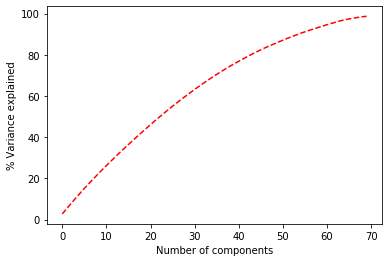

In [75]:
plt.plot( range(0,70), var_explained_cumulative,'r--' )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [76]:
svd = TruncatedSVD(n_components=70,n_iter=5, random_state=4500)
reduced_X = svd.fit_transform(X)

In [77]:
labels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',
        'PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23',
        'PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35',
        'PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47',
        'PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59',
        'PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70']
Svdframe=pd.DataFrame(reduced_X, columns=labels)

In [79]:
Svdframe['TARGET']=y

In [80]:
Svdframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,TARGET
0,-1.402492,-1.025043,-0.309232,-1.729820,-1.374562,-1.173212,-3.351117,-1.753172,2.480790,1.845916,-3.513874,7.796071,-1.357688,-3.973145,1.548714,-0.616640,-2.226253,1.147229,0.784899,0.324120,-5.771956,-2.489204,4.284578,-3.486949,-1.981766,0.168032,5.953187,0.668823,-2.683500,-9.508113,-3.845723,1.123583,-11.138700,-13.442578,9.126034,2.477025,0.765895,-4.719140,0.032591,-11.788478,-1.510567,3.465091,-0.447912,1.882349,-2.277830,-0.155615,-3.745828,-4.685728,-2.010826,1.558970,2.453411,-4.171587,-2.184765,-0.067383,-2.364944,-2.510377,-0.194363,-1.694647,-0.527882,1.036659,-0.455145,0.067701,0.206006,0.185620,0.274252,0.094283,-0.027197,-0.100241,0.053726,-0.044959,-0.383582
1,-0.572502,-0.787882,-1.254083,1.073578,-0.639535,-1.331443,-0.984776,1.440897,0.642958,0.955084,3.042290,5.018864,-0.113220,-0.158146,4.234830,1.654105,0.159923,-0.132566,1.248363,-4.281049,0.728524,-1.259463,-5.945630,-3.616706,-3.619341,2.716946,16.939503,10.830314,17.218358,16.249134,-4.754286,2.394622,0.290573,-0.944447,0.075453,-2.114202,3.363985,0.285309,1.580992,-1.065434,-0.312222,-0.633642,0.536377,1.293032,-0.222356,-0.809684,-1.182429,0.324464,-0.033550,0.807736,-0.088087,-0.381275,0.576638,-0.904039,0.105113,-0.488560,-0.218953,-0.010971,0.624394,0.131545,-0.906650,-0.002837,-0.148251,-0.039725,-0.111099,-0.005243,-0.367821,-0.048621,0.052049,-0.022140,-0.410683
2,-1.306555,-3.869856,-3.330776,-4.799467,0.248650,4.414247,-3.444685,0.914089,0.293496,1.813337,1.608535,1.381824,-2.869540,-0.623610,-2.965370,-0.157778,-0.553047,-2.542633,-0.825704,1.309093,-0.363209,-0.784457,-0.943274,-0.199612,-0.010726,0.524626,-2.181467,-0.519629,0.419008,0.870885,0.276003,-1.390014,0.409976,-0.237081,-1.927154,-0.360021,0.482870,-0.755275,0.006881,-0.085986,0.199941,-0.320234,-0.347723,-0.215289,-0.104856,0.440427,-1.036121,0.620581,0.260590,0.123034,-0.384253,-0.315943,0.226515,0.234823,-0.186311,-0.132251,-0.243578,-0.163688,-0.216588,-0.044507,0.252063,-0.102300,-0.030417,-0.246441,-0.047541,-1.020579,0.253668,-7.083050,0.302208,-5.632503,-0.428455
3,-1.618529,-1.993094,1.392680,-2.913901,-3.727298,-4.296982,0.876409,1.411321,32.272624,7.204451,-1.152956,-14.994659,6.084986,8.505835,-2.369573,0.280265,2.869094,0.436432,1.952596,-3.091948,0.221054,-0.200284,-2.439774,3.103758,-2.803140,2.764937,0.362924,-0.609503,-0.037761,-0.354418,0.779817,-1.019027,-1.002449,-1.283874,0.652633,-1.038247,0.690871,-0.461908,0.062227,-0.734546,0.129430,-0.791030,0.223732,0.025963,0.108720,-0.364024,-1.220387,0.106337,-0.323839,0.051238,0.594284,0.075987,0.669944,0.514225,0.107147,0.057446,-0.122376,0.007060,-0.154454,-0.516981,0.155184,0.032595,0.041702,0.010174,-0.447523,0.005145,-0.216398,-0.034451,0.048472,-0.014205,-0.420902
4,-1.284949,-3.871001,-3.228703,-4.698183,0.215385,4.298100,-3.416303,0.822934,0.302922,2.048688,1.526939,1.280901,-2.853876,-0.683180,-2.840817,-0.086742,-0.898431,-3.128959,-0.847156,1.012486,-0.426742,-0.406685,-0.655912,-0.623656,0.238572,0.566886,-2.088176,-0.552186,0.288945,0.893382,0.206348,-1.315314,0.560052,-0.164841,-1.587285,-0.522601,0.560905,-0.617214,-0.140057,-0.117674,0.181298,-0.272077,-0.378721,-0.222023,-0.118223,0.458491,-1.029388,0.599940,0.257254,0.099497,-0.303315,-0.318419,0.178582,0.240819,-0.121392,-0.131346,-0.198151,-0.078616,-0.222840,-0.010551,0.309359,-0.125395,-0.079360,-0.267369,-0.049848,-0.469572,0.020246,-3.476828,5.892797,0.998958,-0.425345


In [82]:
predictors=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',
            'PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23',
            'PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35',
            'PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47',
            'PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59',
            'PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70']

X=Svdframe[predictors].values

Target=['TARGET']

y=Svdframe[Target].values



In [94]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

In [150]:
def Lasso_Regression(Data1,Data2):
    # Lasso Regrresion
    from sklearn.linear_model import Lasso
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i, random_state=j)
                lass=Lasso(alpha=0.01,max_iter=600,tol=0.001)
                predictmodel=lass.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)

In [151]:
Lasso_Regression(X,y)

The R squared is 0.9621839881191228
99.00058286795236
The R squared is 0.998836333746596
99.09790976584118
The R squared is 0.9995030596263085
99.17688400587785
The R squared is 0.9989121886452647
99.13991048565913
The R squared is 0.9464793838638829
98.83850937002114
The R squared is 0.9995149614212663
99.31184877922506
The R squared is 0.9620797929564875
99.1044326449285
The R squared is 0.9990378958719742
99.14078039475476
The R squared is 0.9996113753418268
99.29406446681016
The R squared is 0.9994574145900216
99.16110301494032
The R squared is 0.9419201341656518
98.88060913533764
The R squared is 0.9995569479302486
99.30728596371414
The R squared is 0.9616362508541523
99.12647756034161
The R squared is 0.9994410303154375
99.11827561345535
The R squared is 0.9996785769615706
99.25206449400655
The R squared is 0.9993666989958695
99.02516525967754
The R squared is 0.9310922973691327
98.77789028739986
The R squared is 0.9995743330156417
99.0465163287828
The R squared is 0.961238050562

In [160]:
def Linear_Regression(Data1,Data2):
    from sklearn.linear_model import LinearRegression
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i, random_state=j)
                mlr=LinearRegression(n_jobs=1,normalize=True)
                predictmodel=mlr.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                Predictedvalue=Target_scaler.inverse_transform(predictions)
                Targetvalue=Target_scaler.inverse_transform(y_test)
                print("Thr R2 Value",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(Targetvalue,Predictedvalue)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)
    

In [161]:
Linear_Regression(X,y)

Thr R2 Value 1.0
-80313.62137237118
Thr R2 Value 1.0
-1680.4139294199274
Thr R2 Value 1.0
-29054.33924568217
Thr R2 Value 1.0
-3300.305767731674
Thr R2 Value 1.0
-58386.702071082014
Thr R2 Value 1.0
-112.44924307278538
Thr R2 Value 1.0
-65752.42667157079
Thr R2 Value 1.0
-754.8167240142253
Thr R2 Value 1.0
-12659.24013129543
Thr R2 Value 1.0
-1088.7159270372558
Thr R2 Value 1.0
-48473.21569584996
Thr R2 Value 1.0
-116.1924205818884
Thr R2 Value 1.0
-59138.60119111376
Thr R2 Value 1.0
-663.0739907848263
Thr R2 Value 1.0
-11400.269751524738
Thr R2 Value 1.0
-686.6325079267838
Thr R2 Value 1.0
-41556.05357177158
Thr R2 Value 1.0
-122.99073049695122
Thr R2 Value 1.0
-30208.68627509244
Thr R2 Value 1.0
-597.9494686181814
Thr R2 Value 1.0
-10169.008386954845
Thr R2 Value 1.0
-596.5356659421587
Thr R2 Value 1.0
-26533.268209629703
Thr R2 Value 1.0
-158.64180456607045
Thr R2 Value 1.0
-29266.307719902612
Thr R2 Value 1.0
-565.9828324664796
Thr R2 Value 1.0
-9907.602007337913
Thr R2 Value 1.0
-

In [146]:
def Ridge_Regression(Data1,Data2):
    from sklearn.linear_model import Ridge
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                rig=Ridge(alpha=0.2)
                predictmodel=rig.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)    

In [147]:
Ridge_Regression(X,y)

The R squared is 0.9648635049289133
94.35782701289494
The R squared is 0.999686165701413
98.24335454627627
The R squared is 0.9999994388533547
99.10859644830145
The R squared is 0.9998059286748254
98.39490826110368
The R squared is 0.9519871113242475
93.27534213078629
The R squared is 0.999993425743063
99.24650895005638
The R squared is 0.964709659547659
94.9342248038113
The R squared is 0.9998314636274839
98.31148733473134
The R squared is 0.9999994603349569
99.1930721666225
The R squared is 0.9999368598361359
99.07267788757605
The R squared is 0.9490660695928272
92.96804765588861
The R squared is 0.9999965030408039
99.06528734212533
The R squared is 0.9642504143737605
95.40898176298802
The R squared is 0.9999271256393862
98.86734385598862
The R squared is 0.9999994012237096
99.23211588774996
The R squared is 0.999933854750354
99.06854648409708
The R squared is 0.9395984625444119
93.51538612382578
The R squared is 0.9999992419635809
99.03283653732157
The R squared is 0.966588331710424

In [152]:
def Elasticnet_Regression(Data1,Data2):
    from sklearn.linear_model import ElasticNet
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                Enet=ElasticNet(alpha=0.01)
                predictmodel=Enet.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [153]:
Elasticnet_Regression(X,y)

The R squared is 0.9625676753974619
98.99316271961281
The R squared is 0.9992024193445984
99.0994501972542
The R squared is 0.9998575848794422
99.13231303590035
The R squared is 0.9992653621378018
99.15686452603384
The R squared is 0.9469891104333952
98.90765236781698
The R squared is 0.9998428184199434
99.30345039613977
The R squared is 0.9623541240423994
99.08460773013871
The R squared is 0.9993633025306266
99.1160336093156
The R squared is 0.9998792310721729
99.27631844550986
The R squared is 0.9996802981649587
99.25745801439206
The R squared is 0.9422933649130769
98.87047722064952
The R squared is 0.9998576157995519
99.30377276017919
The R squared is 0.9618780959054867
99.1148415501028
The R squared is 0.9997242853708411
99.15765332136351
The R squared is 0.9999018531774998
99.24776861122035
The R squared is 0.9996516392637912
99.0967947773303
The R squared is 0.9314942688684698
98.77184160091846
The R squared is 0.9998746344705471
99.04807586184313
The R squared is 0.9614499728026

In [164]:
def DecisionTree_Regression(Data1,Data2):
    from sklearn.tree import DecisionTreeRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                dtree=DecisionTreeRegressor(max_depth=5,criterion='mse')
                predictmodel=dtree.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [165]:
DecisionTree_Regression(X,y)

The R squared is 0.9995897496923912
98.77045429412892
The R squared is 0.9996030184730461
99.16874469205348
The R squared is 0.9999457129182697
99.17900468538035
The R squared is 0.9986657695369752
98.61805945024537
The R squared is 0.9996946531711621
98.77387379815713
The R squared is 0.9998185297010314
99.181902927358
The R squared is 0.9996011951297639
98.54247401341179
The R squared is 0.9996057540767802
99.26856265386917
The R squared is 0.9999154122733324
98.94094509514348
The R squared is 0.9986721267244455
98.86895100526047
The R squared is 0.9997408061081017
98.92544403622145
The R squared is 0.9921595023446776
99.01848096659465
The R squared is 0.9995971271028204
98.6362407505255
The R squared is 0.9996466303063195
99.32106131341283
The R squared is 0.9999204711680262
99.30114968117505
The R squared is 0.9990987052526212
98.92417480268165
The R squared is 0.9994969115269209
98.2693311022198
The R squared is 0.9997545012581043
98.96092776783101
The R squared is 0.9996559135466

In [176]:
def RandomForest_Regression(Data1,Data2):
    from sklearn.ensemble import RandomForestRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                rgf=RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=5)
                predictmodel=rgf.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [177]:
 RandomForest_Regression(X,y)

The R squared is 0.914296664873212
99.04677410490184
The R squared is 0.8877256880725733
99.23561748572182
The R squared is 0.8936412836417755
99.35924463205528
The R squared is 0.9016026468855991
99.25416215635916
The R squared is 0.8973690174781693
99.12927409430202
The R squared is 0.8927075843680414
99.35693555388097
The R squared is 0.8990953734494893
99.18175039457509
The R squared is 0.8977465261579849
99.26898064676132
The R squared is 0.8829118950474486
99.407388250665
The R squared is 0.9089211308051794
99.30296000996697
The R squared is 0.8814375648751617
99.17301454988659
The R squared is 0.8805565152583663
99.23648282578385
The R squared is 0.9105029909772754
99.23495704815967
The R squared is 0.8949551506318608
99.283109723814
The R squared is 0.890183354233897
99.43923145198045
The R squared is 0.9176375227860957
99.28079213607225
The R squared is 0.8838071009226528
98.96840862912634
The R squared is 0.8783295816935649
99.17798075160748
The R squared is 0.912396459328893

In [178]:
def AdaBoost_Regression(Data1,Data2):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                dtree=DecisionTreeRegressor(max_depth=5)
                Ada =AdaBoostRegressor( base_estimator=dtree,n_estimators=100,learning_rate=0.001)
                predictmodel= Ada.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [179]:
AdaBoost_Regression(X,y)

The R squared is 0.999828875117837
98.81726262545023
The R squared is 0.999906908747037
99.18794216375603
The R squared is 0.9999248931383559
99.29333610487122
The R squared is 0.9999600962675725
99.4375725686153
The R squared is 0.99991113064111
98.9838026494889
The R squared is 0.9999253025890612
99.43849441227573
The R squared is 0.999886640918103
98.93316716403146
The R squared is 0.9999170346664816
99.26926410225526
The R squared is 0.999950699907706
99.36698984522643
The R squared is 0.9999641123204048
99.28041172033582
The R squared is 0.9999498719965991
99.09041584848494
The R squared is 0.9999522958465987
99.17374589329428
The R squared is 0.9999022090638768
99.15524743666847
The R squared is 0.9999336337864401
99.33585994435177
The R squared is 0.9999745056783655
99.42459894556379
The R squared is 0.9999707211191298
99.35014433853661
The R squared is 0.9999178129741224
98.85796060865732
The R squared is 0.9999551320402473
99.06929878853484
The R squared is 0.9999564533134554


In [180]:
def LGBMRegressor_Regression(Data1,Data2):
    from lightgbm import LGBMRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                lgb=LGBMRegressor(learning_rate=0.01,n_estimators=200,max_depth=-1)
                predictmodel= lgb.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [181]:
LGBMRegressor_Regression(X,y)

The R squared is 0.4805763582457764
99.32340546693075
The R squared is 0.49272556791959554
99.21354519575134
The R squared is 0.4985396906770069
99.37860509211913
The R squared is 0.5560023513451435
99.23482991503656
The R squared is 0.4722160235742322
99.02921330525048
The R squared is 0.5082348520067734
99.40428523808565
The R squared is 0.4332974731909075
99.34671153857859
The R squared is 0.4807800808713082
99.27015827370725
The R squared is 0.48378904086054986
99.413901101354
The R squared is 0.5239506110066128
99.32916210137311
The R squared is 0.43545982430744223
99.07047369904024
The R squared is 0.5080422140120706
99.20277510023732
The R squared is 0.42832651819079204
99.30582871886695
The R squared is 0.47318410788364706
99.32804459268326
The R squared is 0.47789695786290265
99.37336779248606
The R squared is 0.5292087128948699
99.3235910407514
The R squared is 0.3863894681525917
99.00000968349956
The R squared is 0.5107231869872728
99.12214472150035
The R squared is 0.429124

In [182]:
def xgboost_Regression(Data1,Data2):
    from xgboost import XGBRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                xgb=XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=400, objective='reg:linear', booster='gbtree')
                predictmodel= xgb.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [183]:
xgboost_Regression(X,y)

[11:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
The R squared is 0.9953689852156902
98.75191815072148
[11:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
The R squared is 0.9954898393431418
99.24736461576997
[11:23:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
The R squared is 0.9954779524539955
99.37630848193342
[11:23:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
The R squared is 0.995595796268425
99.2257697810454
[11:23:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0

The R squared is 0.9944455060824805
99.10338019699319


In [185]:
def KNeighborsRegresso_Regression(Data1,Data2):
    from sklearn.neighbors import KNeighborsRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                knn=KNeighborsRegressor(n_neighbors=3)
                predictmodel=knn.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [186]:
KNeighborsRegresso_Regression(X,y)

The R squared is 0.4348585840321292
99.00678213295127
The R squared is 0.4484595366118722
98.99560348386662
The R squared is 0.45214965028298304
99.25990870033687
The R squared is 0.42982111559532055
99.41764449703865
The R squared is 0.4814499122280127
98.93228315032262
The R squared is 0.4339359000481905
99.40318213928074
The R squared is 0.4429961591470958
99.08543728558199
The R squared is 0.44807266079165453
99.09135601193127
The R squared is 0.4462153141794407
99.33714194782227
The R squared is 0.4240619225186735
99.47969306937935
The R squared is 0.46190848650476457
98.93518392614713
The R squared is 0.44983670440101686
99.13856881877926
The R squared is 0.45118726529614606
99.13806518658504
The R squared is 0.44094481307893063
99.1704399758692
The R squared is 0.43768860364395323
99.39489295694564
The R squared is 0.43470490572169385
99.3328222941772
The R squared is 0.4175500756911458
98.87049634259417
The R squared is 0.461909400630663
99.03029153787169
The R squared is 0.469

In [187]:
def svm_Regression(Data1,Data2):
    from sklearn import svm
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                SVRl=svm.SVR(kernel='rbf',gamma=0.01,C=3)
                predictmodel=SVRl.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [188]:
svm_Regression(X,y)

The R squared is 0.9379616381940178
99.17895054570582
The R squared is 0.9851058604690491
99.06540372893852
The R squared is 0.9866295258173601
99.25005188977528
The R squared is 0.9878800512223825
99.25713827787183
The R squared is 0.9175414209695091
98.98574390871653
The R squared is 0.9873542486441579
99.30288599114266
The R squared is 0.938776420680981
99.24008191197854
The R squared is 0.9858645503890333
99.13792572486894
The R squared is 0.987521583425254
99.27893093353983
The R squared is 0.9887117229689211
99.31846060620963
The R squared is 0.9108190093363662
98.9727490018062
The R squared is 0.986293636643674
99.1454139453347
The R squared is 0.9394271476639658
99.27680249745607
The R squared is 0.9867770096045051
99.18267823502869
The R squared is 0.9884386451619636
99.28114197559945
The R squared is 0.9886374837090819
99.26172379388265
The R squared is 0.8946773178170102
98.88560015175067
The R squared is 0.9852750350817717
99.09016421995851
The R squared is 0.94051195911445

In [189]:
def catboost_Regression(Data1,Data2):
    from catboost import CatBoostRegressor
    Test_Size=[0.20,0.25,0.30,0.33,0.35,0.40]
    Random_State=[5412,7,587,75,78596,524]
    for i in Test_Size:
         for j in Random_State:
                X_train,X_test, y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
                cat=CatBoostRegressor(iterations=150,learning_rate=0.01,depth=3)
                predictmodel=cat.fit(X_train,y_train)
                predictions=predictmodel.predict(X_test)
                print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
                MSE=metrics.mean_squared_error(y_test,predictions)
                RMSE= math.sqrt(MSE)
                print(100-RMSE)  

In [190]:
catboost_Regression(X,y)

0:	learn: 1.0377483	total: 192ms	remaining: 28.6s
1:	learn: 1.0338766	total: 193ms	remaining: 14.3s
2:	learn: 1.0322247	total: 195ms	remaining: 9.54s
3:	learn: 1.0286500	total: 196ms	remaining: 7.15s
4:	learn: 1.0262744	total: 197ms	remaining: 5.71s
5:	learn: 1.0239474	total: 198ms	remaining: 4.76s
6:	learn: 1.0215224	total: 199ms	remaining: 4.07s
7:	learn: 1.0177150	total: 200ms	remaining: 3.56s
8:	learn: 1.0133080	total: 202ms	remaining: 3.16s
9:	learn: 1.0106116	total: 203ms	remaining: 2.84s
10:	learn: 1.0073244	total: 204ms	remaining: 2.58s
11:	learn: 1.0040790	total: 205ms	remaining: 2.36s
12:	learn: 1.0004866	total: 206ms	remaining: 2.17s
13:	learn: 0.9972400	total: 207ms	remaining: 2.01s
14:	learn: 0.9934390	total: 209ms	remaining: 1.88s
15:	learn: 0.9912530	total: 210ms	remaining: 1.76s
16:	learn: 0.9898501	total: 211ms	remaining: 1.65s
17:	learn: 0.9856011	total: 212ms	remaining: 1.55s
18:	learn: 0.9826025	total: 213ms	remaining: 1.47s
19:	learn: 0.9786003	total: 214ms	remaini

103:	learn: 0.7288771	total: 164ms	remaining: 72.5ms
104:	learn: 0.7259854	total: 165ms	remaining: 70.8ms
105:	learn: 0.7240069	total: 166ms	remaining: 69.1ms
106:	learn: 0.7224611	total: 168ms	remaining: 67.4ms
107:	learn: 0.7213658	total: 169ms	remaining: 65.7ms
108:	learn: 0.7194124	total: 170ms	remaining: 64.1ms
109:	learn: 0.7170062	total: 172ms	remaining: 62.4ms
110:	learn: 0.7142513	total: 173ms	remaining: 60.7ms
111:	learn: 0.7105801	total: 174ms	remaining: 59ms
112:	learn: 0.7077013	total: 175ms	remaining: 57.3ms
113:	learn: 0.7049172	total: 176ms	remaining: 55.6ms
114:	learn: 0.7027929	total: 177ms	remaining: 54ms
115:	learn: 0.7007569	total: 178ms	remaining: 52.3ms
116:	learn: 0.6992325	total: 180ms	remaining: 50.7ms
117:	learn: 0.6976518	total: 181ms	remaining: 49.1ms
118:	learn: 0.6948331	total: 183ms	remaining: 47.7ms
119:	learn: 0.6929412	total: 184ms	remaining: 46.1ms
120:	learn: 0.6911790	total: 186ms	remaining: 44.5ms
121:	learn: 0.6896020	total: 188ms	remaining: 43.1

122:	learn: 0.7188051	total: 189ms	remaining: 41.5ms
123:	learn: 0.7149915	total: 190ms	remaining: 39.9ms
124:	learn: 0.7128238	total: 192ms	remaining: 38.4ms
125:	learn: 0.7121884	total: 194ms	remaining: 36.9ms
126:	learn: 0.7098673	total: 195ms	remaining: 35.4ms
127:	learn: 0.7077845	total: 201ms	remaining: 34.6ms
128:	learn: 0.7056441	total: 203ms	remaining: 33ms
129:	learn: 0.7043304	total: 204ms	remaining: 31.3ms
130:	learn: 0.7029768	total: 205ms	remaining: 29.7ms
131:	learn: 0.7002909	total: 206ms	remaining: 28.1ms
132:	learn: 0.6992203	total: 208ms	remaining: 26.5ms
133:	learn: 0.6986538	total: 209ms	remaining: 24.9ms
134:	learn: 0.6957259	total: 210ms	remaining: 23.3ms
135:	learn: 0.6951756	total: 212ms	remaining: 21.8ms
136:	learn: 0.6929652	total: 213ms	remaining: 20.2ms
137:	learn: 0.6918560	total: 214ms	remaining: 18.6ms
138:	learn: 0.6890988	total: 215ms	remaining: 17ms
139:	learn: 0.6871439	total: 216ms	remaining: 15.4ms
140:	learn: 0.6850406	total: 218ms	remaining: 13.9

The R squared is 0.6419338950870388
99.3830708284202
0:	learn: 0.9932026	total: 2.68ms	remaining: 399ms
1:	learn: 0.9888166	total: 3.95ms	remaining: 292ms
2:	learn: 0.9852331	total: 5.2ms	remaining: 255ms
3:	learn: 0.9822558	total: 6.9ms	remaining: 252ms
4:	learn: 0.9791513	total: 8.94ms	remaining: 259ms
5:	learn: 0.9757697	total: 10.5ms	remaining: 253ms
6:	learn: 0.9709311	total: 12.7ms	remaining: 260ms
7:	learn: 0.9673719	total: 14.3ms	remaining: 253ms
8:	learn: 0.9642597	total: 16ms	remaining: 251ms
9:	learn: 0.9615925	total: 17.6ms	remaining: 247ms
10:	learn: 0.9586440	total: 19ms	remaining: 240ms
11:	learn: 0.9557853	total: 20.6ms	remaining: 237ms
12:	learn: 0.9534009	total: 21.8ms	remaining: 230ms
13:	learn: 0.9481230	total: 23.1ms	remaining: 224ms
14:	learn: 0.9444833	total: 24.3ms	remaining: 219ms
15:	learn: 0.9410862	total: 27.9ms	remaining: 234ms
16:	learn: 0.9389728	total: 29.6ms	remaining: 232ms
17:	learn: 0.9360852	total: 31.3ms	remaining: 230ms
18:	learn: 0.9337175	total:

74:	learn: 0.8421317	total: 113ms	remaining: 113ms
75:	learn: 0.8406713	total: 115ms	remaining: 112ms
76:	learn: 0.8379078	total: 117ms	remaining: 111ms
77:	learn: 0.8346790	total: 119ms	remaining: 110ms
78:	learn: 0.8342409	total: 120ms	remaining: 108ms
79:	learn: 0.8316489	total: 124ms	remaining: 108ms
80:	learn: 0.8304053	total: 127ms	remaining: 108ms
81:	learn: 0.8261853	total: 128ms	remaining: 107ms
82:	learn: 0.8232107	total: 130ms	remaining: 105ms
83:	learn: 0.8191441	total: 132ms	remaining: 104ms
84:	learn: 0.8173416	total: 133ms	remaining: 102ms
85:	learn: 0.8151358	total: 135ms	remaining: 100ms
86:	learn: 0.8125583	total: 136ms	remaining: 98.6ms
87:	learn: 0.8102401	total: 138ms	remaining: 97.1ms
88:	learn: 0.8075883	total: 141ms	remaining: 96.8ms
89:	learn: 0.8053622	total: 143ms	remaining: 95.4ms
90:	learn: 0.8037068	total: 145ms	remaining: 93.7ms
91:	learn: 0.8025379	total: 146ms	remaining: 92.1ms
92:	learn: 0.7992167	total: 148ms	remaining: 91ms
93:	learn: 0.7953071	total

The R squared is 0.5974185690432166
99.30979678257468
0:	learn: 1.0488684	total: 2.36ms	remaining: 352ms
1:	learn: 1.0447275	total: 3.62ms	remaining: 268ms
2:	learn: 1.0414187	total: 4.86ms	remaining: 238ms
3:	learn: 1.0369254	total: 6.05ms	remaining: 221ms
4:	learn: 1.0348704	total: 7.24ms	remaining: 210ms
5:	learn: 1.0315666	total: 8.45ms	remaining: 203ms
6:	learn: 1.0276933	total: 9.59ms	remaining: 196ms
7:	learn: 1.0242663	total: 10.7ms	remaining: 190ms
8:	learn: 1.0197541	total: 11.9ms	remaining: 186ms
9:	learn: 1.0169776	total: 13ms	remaining: 183ms
10:	learn: 1.0150591	total: 14.2ms	remaining: 179ms
11:	learn: 1.0113578	total: 15.4ms	remaining: 177ms
12:	learn: 1.0071478	total: 16.5ms	remaining: 174ms
13:	learn: 1.0031167	total: 17.7ms	remaining: 172ms
14:	learn: 0.9999286	total: 18.9ms	remaining: 170ms
15:	learn: 0.9959689	total: 20ms	remaining: 168ms
16:	learn: 0.9929087	total: 21.2ms	remaining: 166ms
17:	learn: 0.9890555	total: 22.4ms	remaining: 165ms
18:	learn: 0.9862834	tot

73:	learn: 0.8568908	total: 91.6ms	remaining: 94ms
74:	learn: 0.8526000	total: 93.2ms	remaining: 93.2ms
75:	learn: 0.8502712	total: 95.7ms	remaining: 93.1ms
76:	learn: 0.8468856	total: 96.9ms	remaining: 91.8ms
77:	learn: 0.8455374	total: 99.8ms	remaining: 92.1ms
78:	learn: 0.8428861	total: 102ms	remaining: 91.2ms
79:	learn: 0.8385329	total: 103ms	remaining: 90.2ms
80:	learn: 0.8364298	total: 105ms	remaining: 89ms
81:	learn: 0.8322559	total: 106ms	remaining: 87.9ms
82:	learn: 0.8296479	total: 107ms	remaining: 86.7ms
83:	learn: 0.8280060	total: 109ms	remaining: 85.5ms
84:	learn: 0.8250168	total: 110ms	remaining: 84.3ms
85:	learn: 0.8234550	total: 112ms	remaining: 83.7ms
86:	learn: 0.8201198	total: 115ms	remaining: 83ms
87:	learn: 0.8172032	total: 116ms	remaining: 81.8ms
88:	learn: 0.8142403	total: 118ms	remaining: 80.6ms
89:	learn: 0.8123850	total: 119ms	remaining: 79.4ms
90:	learn: 0.8105351	total: 121ms	remaining: 78.3ms
91:	learn: 0.8076512	total: 122ms	remaining: 77.2ms
92:	learn: 0.

The R squared is 0.6464911212878997
99.41393089686204
0:	learn: 0.9845916	total: 1.81ms	remaining: 270ms
1:	learn: 0.9811190	total: 2.93ms	remaining: 217ms
2:	learn: 0.9770345	total: 4.13ms	remaining: 203ms
3:	learn: 0.9741680	total: 5.3ms	remaining: 194ms
4:	learn: 0.9712772	total: 6.44ms	remaining: 187ms
5:	learn: 0.9686106	total: 7.58ms	remaining: 182ms
6:	learn: 0.9642854	total: 8.83ms	remaining: 180ms
7:	learn: 0.9621488	total: 9.95ms	remaining: 177ms
8:	learn: 0.9598496	total: 11.1ms	remaining: 174ms
9:	learn: 0.9563835	total: 12.2ms	remaining: 171ms
10:	learn: 0.9537096	total: 13.3ms	remaining: 168ms
11:	learn: 0.9507044	total: 14.4ms	remaining: 166ms
12:	learn: 0.9457206	total: 15.5ms	remaining: 164ms
13:	learn: 0.9426829	total: 16.6ms	remaining: 161ms
14:	learn: 0.9381765	total: 17.7ms	remaining: 159ms
15:	learn: 0.9350994	total: 18.8ms	remaining: 158ms
16:	learn: 0.9324667	total: 19.9ms	remaining: 156ms
17:	learn: 0.9293914	total: 21ms	remaining: 154ms
18:	learn: 0.9273961	to

44:	learn: 0.9058131	total: 61.3ms	remaining: 143ms
45:	learn: 0.9022509	total: 63ms	remaining: 142ms
46:	learn: 0.9008705	total: 64.4ms	remaining: 141ms
47:	learn: 0.8986203	total: 65.7ms	remaining: 140ms
48:	learn: 0.8961444	total: 66.8ms	remaining: 138ms
49:	learn: 0.8956164	total: 68ms	remaining: 136ms
50:	learn: 0.8911344	total: 69.3ms	remaining: 134ms
51:	learn: 0.8883121	total: 70.8ms	remaining: 133ms
52:	learn: 0.8844905	total: 72.2ms	remaining: 132ms
53:	learn: 0.8819655	total: 73.6ms	remaining: 131ms
54:	learn: 0.8804421	total: 75.3ms	remaining: 130ms
55:	learn: 0.8779703	total: 76.8ms	remaining: 129ms
56:	learn: 0.8752042	total: 78ms	remaining: 127ms
57:	learn: 0.8710394	total: 79.2ms	remaining: 126ms
58:	learn: 0.8685768	total: 80.7ms	remaining: 124ms
59:	learn: 0.8674585	total: 82.2ms	remaining: 123ms
60:	learn: 0.8653256	total: 83.4ms	remaining: 122ms
61:	learn: 0.8615329	total: 84.5ms	remaining: 120ms
62:	learn: 0.8587268	total: 85.7ms	remaining: 118ms
63:	learn: 0.85657

109:	learn: 0.7769779	total: 136ms	remaining: 49.3ms
110:	learn: 0.7743164	total: 137ms	remaining: 48ms
111:	learn: 0.7712718	total: 138ms	remaining: 46.8ms
112:	learn: 0.7687026	total: 139ms	remaining: 45.5ms
113:	learn: 0.7667133	total: 140ms	remaining: 44.3ms
114:	learn: 0.7646361	total: 141ms	remaining: 43ms
115:	learn: 0.7624570	total: 142ms	remaining: 41.7ms
116:	learn: 0.7599042	total: 144ms	remaining: 40.5ms
117:	learn: 0.7582618	total: 145ms	remaining: 39.2ms
118:	learn: 0.7557455	total: 146ms	remaining: 38ms
119:	learn: 0.7543965	total: 147ms	remaining: 36.7ms
120:	learn: 0.7517999	total: 148ms	remaining: 35.4ms
121:	learn: 0.7501451	total: 149ms	remaining: 34.2ms
122:	learn: 0.7480817	total: 150ms	remaining: 32.9ms
123:	learn: 0.7461617	total: 151ms	remaining: 31.7ms
124:	learn: 0.7441073	total: 152ms	remaining: 30.4ms
125:	learn: 0.7415946	total: 153ms	remaining: 29.2ms
126:	learn: 0.7393079	total: 154ms	remaining: 27.9ms
127:	learn: 0.7377169	total: 155ms	remaining: 26.7ms

The R squared is 0.6321648103302911
99.31491388903063
0:	learn: 1.1186945	total: 1.56ms	remaining: 232ms
1:	learn: 1.1140262	total: 2.67ms	remaining: 198ms
2:	learn: 1.1097281	total: 3.79ms	remaining: 186ms
3:	learn: 1.1044592	total: 4.85ms	remaining: 177ms
4:	learn: 1.1016627	total: 6.18ms	remaining: 179ms
5:	learn: 1.1000222	total: 7.51ms	remaining: 180ms
6:	learn: 1.0942664	total: 8.88ms	remaining: 181ms
7:	learn: 1.0913278	total: 10.2ms	remaining: 181ms
8:	learn: 1.0878791	total: 11.6ms	remaining: 181ms
9:	learn: 1.0847308	total: 12.6ms	remaining: 177ms
10:	learn: 1.0817544	total: 13.8ms	remaining: 174ms
11:	learn: 1.0790089	total: 14.9ms	remaining: 171ms
12:	learn: 1.0769999	total: 16ms	remaining: 168ms
13:	learn: 1.0725657	total: 17.2ms	remaining: 167ms
14:	learn: 1.0692716	total: 18.3ms	remaining: 164ms
15:	learn: 1.0653878	total: 19.3ms	remaining: 162ms
16:	learn: 1.0631832	total: 20.4ms	remaining: 160ms
17:	learn: 1.0594485	total: 21.4ms	remaining: 157ms
18:	learn: 1.0567800	t

43:	learn: 0.9473642	total: 52ms	remaining: 125ms
44:	learn: 0.9429704	total: 53.3ms	remaining: 124ms
45:	learn: 0.9407130	total: 55.6ms	remaining: 126ms
46:	learn: 0.9381880	total: 57ms	remaining: 125ms
47:	learn: 0.9348459	total: 58.6ms	remaining: 125ms
48:	learn: 0.9328794	total: 60ms	remaining: 124ms
49:	learn: 0.9302224	total: 61.3ms	remaining: 123ms
50:	learn: 0.9271983	total: 62.7ms	remaining: 122ms
51:	learn: 0.9226888	total: 64.1ms	remaining: 121ms
52:	learn: 0.9170094	total: 65.5ms	remaining: 120ms
53:	learn: 0.9148022	total: 67ms	remaining: 119ms
54:	learn: 0.9119526	total: 68.4ms	remaining: 118ms
55:	learn: 0.9086716	total: 70ms	remaining: 118ms
56:	learn: 0.9051204	total: 71.5ms	remaining: 117ms
57:	learn: 0.9006682	total: 73ms	remaining: 116ms
58:	learn: 0.8973885	total: 75ms	remaining: 116ms
59:	learn: 0.8938539	total: 76.4ms	remaining: 115ms
60:	learn: 0.8908742	total: 77.6ms	remaining: 113ms
61:	learn: 0.8865952	total: 78.7ms	remaining: 112ms
62:	learn: 0.8830837	total

113:	learn: 0.6506490	total: 137ms	remaining: 43.3ms
114:	learn: 0.6486935	total: 138ms	remaining: 42.1ms
115:	learn: 0.6472303	total: 140ms	remaining: 41.1ms
116:	learn: 0.6459027	total: 142ms	remaining: 39.9ms
117:	learn: 0.6436600	total: 143ms	remaining: 38.7ms
118:	learn: 0.6415946	total: 144ms	remaining: 37.6ms
119:	learn: 0.6398479	total: 146ms	remaining: 36.5ms
120:	learn: 0.6377563	total: 147ms	remaining: 35.3ms
121:	learn: 0.6361337	total: 149ms	remaining: 34.1ms
122:	learn: 0.6345218	total: 150ms	remaining: 32.9ms
123:	learn: 0.6316297	total: 152ms	remaining: 32ms
124:	learn: 0.6309031	total: 154ms	remaining: 30.8ms
125:	learn: 0.6293213	total: 155ms	remaining: 29.6ms
126:	learn: 0.6274956	total: 157ms	remaining: 28.5ms
127:	learn: 0.6258568	total: 159ms	remaining: 27.3ms
128:	learn: 0.6245694	total: 160ms	remaining: 26ms
129:	learn: 0.6233189	total: 161ms	remaining: 24.8ms
130:	learn: 0.6228772	total: 164ms	remaining: 23.8ms
131:	learn: 0.6209636	total: 166ms	remaining: 22.6

143:	learn: 0.6573682	total: 198ms	remaining: 8.24ms
144:	learn: 0.6564351	total: 200ms	remaining: 6.89ms
145:	learn: 0.6551786	total: 202ms	remaining: 5.53ms
146:	learn: 0.6533664	total: 203ms	remaining: 4.14ms
147:	learn: 0.6510310	total: 204ms	remaining: 2.76ms
148:	learn: 0.6495311	total: 206ms	remaining: 1.38ms
149:	learn: 0.6481032	total: 207ms	remaining: 0us
The R squared is 0.6160141882701848
99.16409422661772
0:	learn: 1.1203097	total: 2.14ms	remaining: 318ms
1:	learn: 1.1171312	total: 3.23ms	remaining: 239ms
2:	learn: 1.1148410	total: 4.38ms	remaining: 215ms
3:	learn: 1.1108177	total: 5.45ms	remaining: 199ms
4:	learn: 1.1065487	total: 6.58ms	remaining: 191ms
5:	learn: 1.1011668	total: 7.62ms	remaining: 183ms
6:	learn: 1.0971223	total: 8.76ms	remaining: 179ms
7:	learn: 1.0934906	total: 9.82ms	remaining: 174ms
8:	learn: 1.0910132	total: 10.9ms	remaining: 171ms
9:	learn: 1.0882402	total: 12ms	remaining: 169ms
10:	learn: 1.0853139	total: 13.2ms	remaining: 166ms
11:	learn: 1.08141

The R squared is 0.6110661240358768
99.369221745598
0:	learn: 1.1042157	total: 2.06ms	remaining: 307ms
1:	learn: 1.0999110	total: 3.15ms	remaining: 233ms
2:	learn: 1.0980190	total: 4.18ms	remaining: 205ms
3:	learn: 1.0957135	total: 5.28ms	remaining: 193ms
4:	learn: 1.0920143	total: 6.43ms	remaining: 186ms
5:	learn: 1.0892472	total: 7.5ms	remaining: 180ms
6:	learn: 1.0839660	total: 8.51ms	remaining: 174ms
7:	learn: 1.0790510	total: 9.59ms	remaining: 170ms
8:	learn: 1.0767411	total: 10.7ms	remaining: 167ms
9:	learn: 1.0733206	total: 11.7ms	remaining: 164ms
10:	learn: 1.0684439	total: 12.7ms	remaining: 161ms
11:	learn: 1.0654161	total: 13.8ms	remaining: 158ms
12:	learn: 1.0615024	total: 14.9ms	remaining: 157ms
13:	learn: 1.0571930	total: 15.9ms	remaining: 155ms
14:	learn: 1.0534000	total: 17.1ms	remaining: 154ms
15:	learn: 1.0508513	total: 18.2ms	remaining: 152ms
16:	learn: 1.0491269	total: 19.3ms	remaining: 151ms
17:	learn: 1.0453140	total: 20.4ms	remaining: 150ms
18:	learn: 1.0423158	to

27:	learn: 1.0483960	total: 63.3ms	remaining: 276ms
28:	learn: 1.0462681	total: 65ms	remaining: 271ms
29:	learn: 1.0419854	total: 66.4ms	remaining: 266ms
30:	learn: 1.0364153	total: 67.5ms	remaining: 259ms
31:	learn: 1.0335283	total: 68.6ms	remaining: 253ms
32:	learn: 1.0312832	total: 69.7ms	remaining: 247ms
33:	learn: 1.0277706	total: 70.7ms	remaining: 241ms
34:	learn: 1.0248498	total: 72ms	remaining: 237ms
35:	learn: 1.0213698	total: 73.4ms	remaining: 232ms
36:	learn: 1.0191038	total: 74.7ms	remaining: 228ms
37:	learn: 1.0150013	total: 76.1ms	remaining: 224ms
38:	learn: 1.0115058	total: 77.4ms	remaining: 220ms
39:	learn: 1.0090197	total: 78.7ms	remaining: 216ms
40:	learn: 1.0082062	total: 80.1ms	remaining: 213ms
41:	learn: 1.0052446	total: 81.5ms	remaining: 210ms
42:	learn: 1.0025859	total: 83.3ms	remaining: 207ms
43:	learn: 0.9990087	total: 84.9ms	remaining: 205ms
44:	learn: 0.9947981	total: 86.2ms	remaining: 201ms
45:	learn: 0.9910206	total: 87.7ms	remaining: 198ms
46:	learn: 0.987

35:	learn: 0.9446172	total: 53.7ms	remaining: 170ms
36:	learn: 0.9421776	total: 56.2ms	remaining: 172ms
37:	learn: 0.9386437	total: 57.8ms	remaining: 170ms
38:	learn: 0.9356135	total: 59.7ms	remaining: 170ms
39:	learn: 0.9321858	total: 61.9ms	remaining: 170ms
40:	learn: 0.9300690	total: 63.6ms	remaining: 169ms
41:	learn: 0.9249621	total: 65.5ms	remaining: 168ms
42:	learn: 0.9223741	total: 67.4ms	remaining: 168ms
43:	learn: 0.9180814	total: 69.2ms	remaining: 167ms
44:	learn: 0.9142002	total: 71.1ms	remaining: 166ms
45:	learn: 0.9120085	total: 74.2ms	remaining: 168ms
46:	learn: 0.9098865	total: 75.6ms	remaining: 166ms
47:	learn: 0.9059034	total: 77ms	remaining: 164ms
48:	learn: 0.9031021	total: 78.1ms	remaining: 161ms
49:	learn: 0.8993223	total: 79.3ms	remaining: 159ms
50:	learn: 0.8950956	total: 80.4ms	remaining: 156ms
51:	learn: 0.8905412	total: 81.6ms	remaining: 154ms
52:	learn: 0.8866762	total: 82.7ms	remaining: 151ms
53:	learn: 0.8850227	total: 83.8ms	remaining: 149ms
54:	learn: 0.8

131:	learn: 0.6337158	total: 172ms	remaining: 23.5ms
132:	learn: 0.6328740	total: 174ms	remaining: 22.2ms
133:	learn: 0.6298531	total: 175ms	remaining: 20.9ms
134:	learn: 0.6277046	total: 177ms	remaining: 19.7ms
135:	learn: 0.6261809	total: 178ms	remaining: 18.4ms
136:	learn: 0.6247510	total: 180ms	remaining: 17ms
137:	learn: 0.6234116	total: 181ms	remaining: 15.7ms
138:	learn: 0.6223248	total: 182ms	remaining: 14.4ms
139:	learn: 0.6188937	total: 183ms	remaining: 13.1ms
140:	learn: 0.6177091	total: 185ms	remaining: 11.8ms
141:	learn: 0.6157379	total: 186ms	remaining: 10.5ms
142:	learn: 0.6136719	total: 188ms	remaining: 9.18ms
143:	learn: 0.6111717	total: 189ms	remaining: 7.88ms
144:	learn: 0.6098676	total: 191ms	remaining: 6.57ms
145:	learn: 0.6077111	total: 192ms	remaining: 5.26ms
146:	learn: 0.6063025	total: 194ms	remaining: 3.96ms
147:	learn: 0.6043636	total: 195ms	remaining: 2.64ms
148:	learn: 0.6028670	total: 197ms	remaining: 1.32ms
149:	learn: 0.6008504	total: 199ms	remaining: 0u

The R squared is 0.6045213243211972
99.07936085891608
0:	learn: 1.1284445	total: 2.13ms	remaining: 317ms
1:	learn: 1.1242157	total: 3.23ms	remaining: 239ms
2:	learn: 1.1206404	total: 4.26ms	remaining: 209ms
3:	learn: 1.1170319	total: 5.26ms	remaining: 192ms
4:	learn: 1.1127167	total: 6.39ms	remaining: 185ms
5:	learn: 1.1083691	total: 7.39ms	remaining: 177ms
6:	learn: 1.1045510	total: 8.46ms	remaining: 173ms
7:	learn: 1.1002396	total: 9.45ms	remaining: 168ms
8:	learn: 1.0977371	total: 10.5ms	remaining: 164ms
9:	learn: 1.0941066	total: 11.5ms	remaining: 160ms
10:	learn: 1.0907943	total: 12.5ms	remaining: 157ms
11:	learn: 1.0868577	total: 13.5ms	remaining: 155ms
12:	learn: 1.0821441	total: 14.5ms	remaining: 153ms
13:	learn: 1.0778787	total: 15.5ms	remaining: 150ms
14:	learn: 1.0749902	total: 16.5ms	remaining: 148ms
15:	learn: 1.0719644	total: 17.5ms	remaining: 147ms
16:	learn: 1.0690417	total: 18.5ms	remaining: 145ms
17:	learn: 1.0649120	total: 19.6ms	remaining: 144ms
18:	learn: 1.0615132

88:	learn: 0.8226725	total: 103ms	remaining: 70.4ms
89:	learn: 0.8207325	total: 104ms	remaining: 69.4ms
90:	learn: 0.8182647	total: 105ms	remaining: 68.4ms
91:	learn: 0.8163586	total: 107ms	remaining: 67.3ms
92:	learn: 0.8138624	total: 108ms	remaining: 66.3ms
93:	learn: 0.8103950	total: 110ms	remaining: 65.3ms
94:	learn: 0.8056106	total: 111ms	remaining: 64.2ms
95:	learn: 0.8021717	total: 112ms	remaining: 63.2ms
96:	learn: 0.8007908	total: 114ms	remaining: 62.2ms
97:	learn: 0.7969167	total: 115ms	remaining: 61.1ms
98:	learn: 0.7935754	total: 117ms	remaining: 60ms
99:	learn: 0.7909943	total: 118ms	remaining: 58.9ms
100:	learn: 0.7879219	total: 119ms	remaining: 57.8ms
101:	learn: 0.7855024	total: 121ms	remaining: 56.7ms
102:	learn: 0.7823299	total: 122ms	remaining: 55.6ms
103:	learn: 0.7802342	total: 123ms	remaining: 54.5ms
104:	learn: 0.7772520	total: 125ms	remaining: 53.4ms
105:	learn: 0.7751304	total: 126ms	remaining: 52.3ms
106:	learn: 0.7728344	total: 129ms	remaining: 51.7ms
107:	le

The R squared is 0.629257512549349
99.43471899902393
0:	learn: 1.0723429	total: 2.19ms	remaining: 326ms
1:	learn: 1.0683353	total: 3.23ms	remaining: 239ms
2:	learn: 1.0642133	total: 4.36ms	remaining: 214ms
3:	learn: 1.0618638	total: 5.4ms	remaining: 197ms
4:	learn: 1.0595742	total: 6.5ms	remaining: 188ms
5:	learn: 1.0564337	total: 7.59ms	remaining: 182ms
6:	learn: 1.0531377	total: 8.68ms	remaining: 177ms
7:	learn: 1.0499914	total: 9.75ms	remaining: 173ms
8:	learn: 1.0463608	total: 10.8ms	remaining: 169ms
9:	learn: 1.0423302	total: 11.8ms	remaining: 165ms
10:	learn: 1.0385055	total: 12.8ms	remaining: 162ms
11:	learn: 1.0349651	total: 13.8ms	remaining: 159ms
12:	learn: 1.0305854	total: 14.9ms	remaining: 157ms
13:	learn: 1.0278455	total: 15.9ms	remaining: 154ms
14:	learn: 1.0237373	total: 16.9ms	remaining: 152ms
15:	learn: 1.0199370	total: 18ms	remaining: 151ms
16:	learn: 1.0169400	total: 19ms	remaining: 149ms
17:	learn: 1.0121939	total: 20.1ms	remaining: 147ms
18:	learn: 1.0097561	total:

64:	learn: 0.7724963	total: 90.2ms	remaining: 118ms
65:	learn: 0.7688865	total: 91.4ms	remaining: 116ms
66:	learn: 0.7661276	total: 92.8ms	remaining: 115ms
67:	learn: 0.7629437	total: 93.9ms	remaining: 113ms
68:	learn: 0.7604951	total: 95ms	remaining: 111ms
69:	learn: 0.7571929	total: 96ms	remaining: 110ms
70:	learn: 0.7556258	total: 97ms	remaining: 108ms
71:	learn: 0.7529983	total: 98ms	remaining: 106ms
72:	learn: 0.7516917	total: 99ms	remaining: 104ms
73:	learn: 0.7497046	total: 100ms	remaining: 103ms
74:	learn: 0.7481419	total: 101ms	remaining: 101ms
75:	learn: 0.7466848	total: 103ms	remaining: 100ms
76:	learn: 0.7431382	total: 104ms	remaining: 98.7ms
77:	learn: 0.7414335	total: 105ms	remaining: 97.3ms
78:	learn: 0.7397563	total: 107ms	remaining: 96ms
79:	learn: 0.7382972	total: 108ms	remaining: 94.8ms
80:	learn: 0.7363787	total: 112ms	remaining: 95.2ms
81:	learn: 0.7328967	total: 113ms	remaining: 93.8ms
82:	learn: 0.7305878	total: 115ms	remaining: 93ms
83:	learn: 0.7280028	total: 1

83:	learn: 0.7843471	total: 92.3ms	remaining: 72.5ms
84:	learn: 0.7811416	total: 93.6ms	remaining: 71.5ms
85:	learn: 0.7793605	total: 95ms	remaining: 70.7ms
86:	learn: 0.7764551	total: 96.4ms	remaining: 69.8ms
87:	learn: 0.7752492	total: 97.7ms	remaining: 68.8ms
88:	learn: 0.7718602	total: 99ms	remaining: 67.9ms
89:	learn: 0.7692934	total: 100ms	remaining: 66.9ms
90:	learn: 0.7665166	total: 102ms	remaining: 65.9ms
91:	learn: 0.7638390	total: 103ms	remaining: 64.9ms
92:	learn: 0.7605632	total: 104ms	remaining: 64ms
93:	learn: 0.7574937	total: 106ms	remaining: 63ms
94:	learn: 0.7531809	total: 107ms	remaining: 62ms
95:	learn: 0.7505603	total: 108ms	remaining: 61ms
96:	learn: 0.7484148	total: 110ms	remaining: 60ms
97:	learn: 0.7456552	total: 111ms	remaining: 59ms
98:	learn: 0.7442353	total: 113ms	remaining: 58.1ms
99:	learn: 0.7413124	total: 114ms	remaining: 57.2ms
100:	learn: 0.7381600	total: 116ms	remaining: 56.1ms
101:	learn: 0.7360009	total: 117ms	remaining: 55.1ms
102:	learn: 0.732279

The R squared is 0.6007558163165055
99.26696863743278
0:	learn: 1.0274906	total: 2.06ms	remaining: 308ms
1:	learn: 1.0234204	total: 3.07ms	remaining: 227ms
2:	learn: 1.0197146	total: 4.14ms	remaining: 203ms
3:	learn: 1.0170709	total: 5.19ms	remaining: 189ms
4:	learn: 1.0141455	total: 6.18ms	remaining: 179ms
5:	learn: 1.0106836	total: 7.15ms	remaining: 172ms
6:	learn: 1.0082335	total: 8.21ms	remaining: 168ms
7:	learn: 1.0033624	total: 9.22ms	remaining: 164ms
8:	learn: 0.9998693	total: 10.8ms	remaining: 169ms
9:	learn: 0.9957234	total: 11.8ms	remaining: 166ms
10:	learn: 0.9911880	total: 12.9ms	remaining: 163ms
11:	learn: 0.9885244	total: 13.9ms	remaining: 160ms
12:	learn: 0.9843965	total: 14.9ms	remaining: 157ms
13:	learn: 0.9811792	total: 15.9ms	remaining: 155ms
14:	learn: 0.9768733	total: 16.9ms	remaining: 152ms
15:	learn: 0.9748213	total: 17.9ms	remaining: 150ms
16:	learn: 0.9709137	total: 18.9ms	remaining: 148ms
17:	learn: 0.9688878	total: 19.9ms	remaining: 146ms
18:	learn: 0.9673837

81:	learn: 0.9024961	total: 94.4ms	remaining: 78.3ms
82:	learn: 0.8993494	total: 95.7ms	remaining: 77.2ms
83:	learn: 0.8948539	total: 97.5ms	remaining: 76.6ms
84:	learn: 0.8919063	total: 99ms	remaining: 75.7ms
85:	learn: 0.8886728	total: 100ms	remaining: 74.7ms
86:	learn: 0.8856856	total: 102ms	remaining: 73.6ms
87:	learn: 0.8818876	total: 103ms	remaining: 72.5ms
88:	learn: 0.8798174	total: 104ms	remaining: 71.4ms
89:	learn: 0.8764772	total: 105ms	remaining: 70.3ms
90:	learn: 0.8731309	total: 107ms	remaining: 69.1ms
91:	learn: 0.8698460	total: 108ms	remaining: 68ms
92:	learn: 0.8672524	total: 109ms	remaining: 66.9ms
93:	learn: 0.8646333	total: 111ms	remaining: 65.9ms
94:	learn: 0.8598358	total: 112ms	remaining: 64.8ms
95:	learn: 0.8567651	total: 113ms	remaining: 63.7ms
96:	learn: 0.8549834	total: 120ms	remaining: 65.5ms
97:	learn: 0.8528353	total: 122ms	remaining: 64.9ms
98:	learn: 0.8483522	total: 124ms	remaining: 63.8ms
99:	learn: 0.8449576	total: 125ms	remaining: 62.7ms
100:	learn: 

The R squared is 0.6243143786842975
99.16495454831357
0:	learn: 0.9609347	total: 2.58ms	remaining: 385ms
1:	learn: 0.9575890	total: 3.7ms	remaining: 274ms
2:	learn: 0.9529237	total: 5.03ms	remaining: 246ms
3:	learn: 0.9486277	total: 6.14ms	remaining: 224ms
4:	learn: 0.9462436	total: 7.23ms	remaining: 210ms
5:	learn: 0.9443996	total: 8.29ms	remaining: 199ms
6:	learn: 0.9394893	total: 9.39ms	remaining: 192ms
7:	learn: 0.9360407	total: 10.5ms	remaining: 186ms
8:	learn: 0.9325123	total: 11.6ms	remaining: 181ms
9:	learn: 0.9290417	total: 12.6ms	remaining: 177ms
10:	learn: 0.9265714	total: 13.7ms	remaining: 173ms
11:	learn: 0.9240081	total: 14.8ms	remaining: 170ms
12:	learn: 0.9188633	total: 16.2ms	remaining: 171ms
13:	learn: 0.9156799	total: 17.5ms	remaining: 170ms
14:	learn: 0.9133826	total: 18.8ms	remaining: 169ms
15:	learn: 0.9090251	total: 20ms	remaining: 167ms
16:	learn: 0.9063373	total: 21.2ms	remaining: 166ms
17:	learn: 0.9028421	total: 22.3ms	remaining: 163ms
18:	learn: 0.8998912	to

62:	learn: 0.8535918	total: 78.8ms	remaining: 109ms
63:	learn: 0.8512008	total: 79.9ms	remaining: 107ms
64:	learn: 0.8505794	total: 81ms	remaining: 106ms
65:	learn: 0.8482580	total: 82.6ms	remaining: 105ms
66:	learn: 0.8464252	total: 83.9ms	remaining: 104ms
67:	learn: 0.8430671	total: 85.2ms	remaining: 103ms
68:	learn: 0.8410404	total: 86.5ms	remaining: 102ms
69:	learn: 0.8380972	total: 87.7ms	remaining: 100ms
70:	learn: 0.8359436	total: 89ms	remaining: 99ms
71:	learn: 0.8320119	total: 90.3ms	remaining: 97.8ms
72:	learn: 0.8295098	total: 91.5ms	remaining: 96.6ms
73:	learn: 0.8280169	total: 92.8ms	remaining: 95.4ms
74:	learn: 0.8243827	total: 94.2ms	remaining: 94.2ms
75:	learn: 0.8212620	total: 95.5ms	remaining: 93ms
76:	learn: 0.8178135	total: 96.8ms	remaining: 91.8ms
77:	learn: 0.8149802	total: 98.1ms	remaining: 90.6ms
78:	learn: 0.8143668	total: 99.4ms	remaining: 89.4ms
79:	learn: 0.8124523	total: 102ms	remaining: 89.2ms
80:	learn: 0.8114190	total: 104ms	remaining: 88.3ms
81:	learn: 